# Environmentally Responsible Happy Nation Index (Years 2016-2019)

In this notebook, we will tabulate the ERHNI for countries for the years 2016-2022. Our data sources are as follows:
* Happiness: https://www.kaggle.com/datasets/unsdsn/world-happiness
* Life expectancy: https://data.worldbank.org/indicator/SP.DYN.LE00.IN

# Calculating NHLY

NHLY is caculated as (well-being - 5) * life expectancy of country in question.
First, let's import required libraries, load our data frames and see what's inside.

In [1]:
# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os
import pycountry
import matplotlib.pyplot as plt

In [3]:
csv_path = 'data'
happiness_2016 = pd.read_csv(os.path.join(csv_path, '2016.csv'))

In [4]:
happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
lifeexp_2016 = pd.read_csv(os.path.join(csv_path, 'API_SP.DYN.LE00.IN_DS2_en_csv_v2_4150700.csv'), skiprows=4)

In [6]:
lifeexp_2016.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


Let's fetch the country code of the countries in the happiness data set using pycountry package.

In [7]:
def findCountryAlpha3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ("not found")

In [8]:
happiness_2016['Country Code'] = happiness_2016.apply(lambda row: findCountryAlpha3(row.Country), axis = 1)

In [9]:
happiness_2016[happiness_2016['Country Code'] == 'not found']
remaining_countries = {'Czech Republic' : 'CZE',
                      'Venezuela' : 'VEN',
                      'Moldova' : 'MDA',
                      'Russia' : 'RUS',
                      'South Korea' : 'KOR',
                      'Bolivia' : 'BOL',
                      'North Cyprus' : 'CYP',
                      'Kosovo' : 'XKX',
                      'Macedonia' : 'MKD',
                      'Vietnam' : 'VNM',
                      'Somaliland Region' : 'SOM',
                      'Laos' : 'LAO',
                      'Iran' : 'IRN',
                      'Congo (Kinshasa)' : 'COD',
                      'Congo (Brazzaville)' : 'COG',
                      'Tanzania' : 'TZA',
                      'Syria' : 'SYR'}

In [10]:
#happiness_2016['Country Code'] = happiness_2016['Country'].map(remaining_countries)
for index, row in happiness_2016.iterrows():
    if row['Country Code'] == 'not found' and remaining_countries.get(row['Country']):
        happiness_2016.at[index, 'Country Code'] = remaining_countries.get(row['Country'])
#        row['Country Code'] = remaining_countries.get(row['Country'])

Now let's calculate NHLY for year 2016.

In [11]:
happiness_2016[happiness_2016['Country'] == 'Denmark']

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country Code
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK


In [12]:
merged_2016 = happiness_2016.merge(lifeexp_2016.drop_duplicates(), on=['Country Code'], how = 'left', indicator=True)

In [13]:
merged_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        157 non-null    object  
 1   Region                         157 non-null    object  
 2   Happiness Rank                 157 non-null    int64   
 3   Happiness Score                157 non-null    float64 
 4   Lower Confidence Interval      157 non-null    float64 
 5   Upper Confidence Interval      157 non-null    float64 
 6   Economy (GDP per Capita)       157 non-null    float64 
 7   Family                         157 non-null    float64 
 8   Health (Life Expectancy)       157 non-null    float64 
 9   Freedom                        157 non-null    float64 
 10  Trust (Government Corruption)  157 non-null    float64 
 11  Generosity                     157 non-null    float64 
 12  Dystopia Residual              157 n

In [14]:
merged_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Country Code', 'Country Name', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', 'Unnamed: 66', '_merge'],
      dtype='object')

In [15]:
# Taiwan, Palestinian Territories and Ivory Coast can't be matched, we should have 154 countries
# Is Somaliland here Somalia?

merged_2016['Country'].values

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad and Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'North Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Croa

# Now we can calculate NHLY for 154 countries

In [16]:
merged_2016 = merged_2016.loc[:, merged_2016.columns.intersection(['Country','Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Country Code', '2016'])]
merged_2016.rename(columns={"2016": "2016_lifeexp"}, inplace=True)

In [17]:
merged_2016['NHLY'] = (merged_2016['Happiness Score'] - 5)  * 0.1 * merged_2016['2016_lifeexp']

In [18]:
merged_2016['NHLY']

0      20.423634
1      20.975852
2      20.559440
3      20.585348
4      19.648882
         ...    
152    -9.230166
153   -10.457132
154   -10.219334
155   -13.577827
156   -12.680616
Name: NHLY, Length: 157, dtype: float64

## Plot a bar chart for top 10 countries

In [19]:
merged_2016.sort_values(by='NHLY', ascending=False)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country Code,2016_lifeexp,NHLY
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,CHE,83.602439,20.975852
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NOR,82.407317,20.585348
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,ISL,82.204878,20.559440
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK,80.853659,20.423634
5,Canada,North America,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,CAN,81.900000,19.688760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Burundi,Sub-Saharan Africa,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,BDI,60.528000,-12.680616
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,SYR,70.315000,-13.577827
34,Taiwan,Eastern Asia,6.379,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523,not found,NaN,NaN
107,Palestinian Territories,Middle East and Northern Africa,4.754,0.67024,0.71629,0.56844,0.17744,0.10613,0.11154,2.40364,not found,NaN,NaN


In [20]:
top_10 = merged_2016.sort_values(by='NHLY', ascending=False).head(10)

In [21]:
top_10

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country Code,2016_lifeexp,NHLY
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,CHE,83.602439,20.975852
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NOR,82.407317,20.585348
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,ISL,82.204878,20.559440
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK,80.853659,20.423634
5,Canada,North America,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,CAN,81.900000,19.688760
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,FIN,81.429268,19.648882
6,Netherlands,Western Europe,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,NLD,81.560976,19.077112
8,Australia,Australia and New Zealand,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,AUS,82.448780,19.070403
7,New Zealand,Australia and New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,NZL,81.612439,19.048343
9,Sweden,Western Europe,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,SWE,82.307317,18.856606


In [22]:
top_10.set_index('Country', inplace=True)

<AxesSubplot:xlabel='Country'>

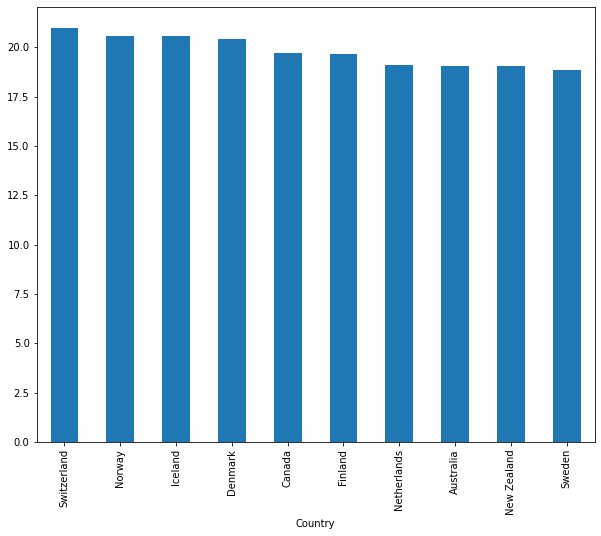

In [23]:
top_10['NHLY'].plot(kind='bar',figsize=(10,8))

# Calculating PCEC in ERHNI Over the Years

## 2008 ERHNI Equation

In the 2008 paper, starting from 400,000 premature deaths annually in China from air pollution, to convert it into a lifetime value (for comparison with HLY) on a per capita basis, multiply by life expectancy (71.6) then divide by population (1,286,975,468), giving us the below:

In [24]:
premature_lifetime_per_cap = 400000 * 71.6 / 1286975468
print(premature_lifetime_per_cap)

0.02225372644010647


Our goal is to calculate 𝜇 which gives us the external environmental costs imposed on ourselves and future generations. In order to get there, 3 main steps are involved:

1. Starting with premature years yearly due to air pollution in China, we will try to approximate $\lambda$ which gives us the estimated external environmental costs in terms of adjusted happy life years lost. This requires the use of 𝛼 (average number of life years lost due to premature death from air pollution in China), 𝛽 (the number of annual premature deaths due to environmental disruption in China other than air pollution as a proportion of annual premature deaths due to air pollution), 𝛾 (welfare costs of this reduction in the QoL as a proportion to the value of premature deaths) and 𝜁 (adjustment factor for value of life years lost with value of living life years).
2. So far, this figure includes costs imposed externally from other countries and internally from China itself. Hence we need to transform this into average external environmental costs attributable to a nation in question on other nations with 𝜂 (**ratio of the figure for a representative nation to that for China of the per capita environmental costs in terms of the proportion of the average HLY of a representative person OR the ratio of the figure for a representative nation to that for China of the per capita environmental costs**) and 𝜃 (ratio of the external portion to the full portion of the index of costs).
> **Question**: Is it right to say that 𝜂 is not the same as a country's per capita total $CO_{2}$ emission divided by the average per capita total $CO_{2}$ emission of the world as it ignores other environmental costs from other gases? Is 𝜂 the external cost ratio or how/what is the external cost ratio related to the figure components of the equation?

3. Last but not least, 𝜇 by considering effect on future generations with a factor of 𝜉 (proportion of the per capita external environmental costs we impose on ourselves and the future generations).

Some key assumed figures are as below:
* 𝛼 = 4
* 𝛽 = 0.7
* 𝛾 = 0.8
* 𝜁 = 1
* 𝜂 = 0.5
* 𝜃 = 0.5
* 𝜉 = 5

For a complete justification, refer to the 2008 paper. Our final equation is as below.

$$
\mu = \lambda \xi = 0.222537 * \alpha (1+\beta)(1+\gamma)\zeta\eta\theta\xi
$$

In [25]:
alpha = 4
beta = 0.7
gamma = 0.8
zeta = 1
eta = 0.5
theta = 0.5
xi = 5
mu = premature_lifetime_per_cap * alpha * (1+beta) * (1+gamma) * zeta * eta * theta * xi
print(mu)

0.34048201453362903


Plugging in the assumed figures into the final equation, we obtain $\approx$ 0.34 HLY. On average, a typical country imposes an external cost of about 0.34 HLY in per capita environmental costs now and into the future.

PCEC of a country = 0.34 * its per capita total $CO_{2}$ emission divided by the average per capita total $CO_{2}$ emission of the world

## 2016 ERHNI Equation

In the 2016 paper calculating ERHNI, 3 key tweaks were made to the equation:
1. We replaced 𝛼 (average number of life years lost due to premature death from air pollution in China) and 𝛽 (the number of annual premature deaths due to environmental disruption in China other than air pollution as a proportion of annual premature deaths due to air pollution) with a measure of $\alpha_{i}$ $\equiv$ healthy life years lost due to climate change.
2. So for $\mu_{i}$ = revised estimated per capita external environmental costs imposed on the present and future generations in terms of HLY, we also revised upwards 𝜁 $\equiv$ 1.2 since life years lost were healthy.
3. $\eta$ was dropped since we are already considering the total yearly environmental costs in terms of healthy life years lost per country.

> **Question**: Is it right to say that it made sense to drop 𝜂 here as we were using as our external cost ratio total greenhouse gases ($CO_{2}$,  $CH_{4}$ and  $N_{2}O$) emitted per capita divided by total world greenhouse gases emitted per capita hence full environmental costs of a country is captured already?

> **Response**: But 𝜂 is different and independent of total green house gases emitted per country.

The other factors stayed the same.

$$
\mu_{i} = \lambda_{i} \xi = \frac{life expectancy of country_{i}}{population of country_{i}} * \alpha_{i} (1+\gamma_{i})\zeta_{i}\theta\xi
$$

## 2022 ERHNI Equation

For year 2016, we switched from $\alpha_{i}$ to $AQLI_{i}$ for 2 main reasons. First of all,  $\alpha_{i}$ $\equiv$ used in 2016 has data available only until year 2004 while $AQLI_{i}$ is available annually till 2019, hence the latter is more updated. In the 2016 analysis when we estimated a country's PCEC in proportion to a world baseline, the implicit assumption that a country's PCEC scales linearly to its per capita greenhouse gas emissions as a proportion of per capita world emissions is not necessarily true. An example $country_{i}$ may contribute $x$ portion of per capita greenhouse gas emissions but suffer disproportionately more environmental costs due to its geographic location or any other relevant factors. $AQLI_{i}$ is therefore more accurate on a country-level since it gives us the years of life expectancy lost due to air pollution.

Henceforth, key changes to be introduced are described as below:

1. Instead of taking $\alpha_{i}$ $\equiv$ as healthy life years lost due to climate change, we use $AQLI_{i}$ which returns the potential gains in life expectancy if $PM_{2.5}$ concentrations were reduced to meet WHO guidelines. $AQLI_{i}$ is therefore equivalent to expected life years lost due to air pollution in $country_{i}$. As in the 2016 update, we dropped 𝛼 and 𝛽. (Source: https://aqli.epic.uchicago.edu/)

2. Given that $AQLI_{i}$ considers only particulate matter pollution, there is a need to reintroduce $\beta$ which gives us an estimate for number of premature deaths due to environmental disruption in China other than particulate matter pollution, assumed to be 0.7 as in the 2008 paper.

3. 𝜁 is brought back to 1 (from 1.2 in 2016) since $AQLI_{i}$ says nothing about the quality of the expected life years lost.

Everything else stays the same to the 2016 paper: 𝛾 = 0.8, 𝜃 = 0.5, 𝜉 = 5.

$$
\mu_{i} = \lambda_{i} \xi = {AQLI_{i}} * (1+\beta) * (1+\gamma_{i})\zeta_{i} \theta\xi
$$

# Calcualate ERHNI for Year 2016

## Let's start by calculating external cost ratio of individual countries

The external cost ratio is given by the per capita total greenhouse gas emissions of a country divided by the average per capita greenhouse gas emissions of the world, or $\frac{total greenhouse gas emissions of country_{i}}{population of country_{i}} * \frac{world population}{total world greenhouse gas emissions}$

In [69]:
co2_2016 = pd.read_csv(os.path.join(csv_path, 'API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4151102.csv'), skiprows=4)
ch4_2016 = pd.read_csv(os.path.join(csv_path, 'API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_4157045.csv'), skiprows=4)
n2o_2016 = pd.read_csv(os.path.join(csv_path, 'API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_4157052.csv'), skiprows=4)
pop_2016 = pd.read_csv(os.path.join(csv_path, 'API_SP.POP.TOTL_DS2_en_csv_v2_4251154.csv'), skiprows=4)

In [27]:
co2_2016.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,573190.0,594270.0,578990.0,584830.0,593740.0,592780.0,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,191990.0,198440.0,193060.0,195120.0,201900.0,224380.0,NaN,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,32820.0,34630.0,35160.0,35410.0,30840.0,27340.0,NaN,NaN,NaN,NaN


In [28]:
#co2_2016[co2_2016['Country Name'] == 'World']

Define constants for Greenhouse Warming Potential and global values for $CO_{2}$, $CH_{4}$ and $N_{2}O$ emissions

In [108]:
CH4_GWP = 21
N2O_GWP = 310
WLD_CO2 = co2_2016[co2_2016['Country Name'] == 'World']['2016']
WLD_CH4 = ch4_2016[ch4_2016['Country Name'] == 'World']['2016']
WLD_N2O = n2o_2016[n2o_2016['Country Name'] == 'World']['2016']
WLD_POP = pop_2016[pop_2016['Country Name'] == 'World']['2016']
print(type(WLD_POP))
WLD_POP

<class 'pandas.core.series.Series'>


259    7.433651e+09
Name: 2016, dtype: float64

In [103]:
merged_2016 = pd.merge(merged_2016,co2_2016[['Country Code', '2016']],on='Country Code', how='left')
merged_2016.rename(columns={"2016": "2016_co2"}, inplace=True)

In [104]:
merged_2016 = pd.merge(merged_2016,ch4_2016[['Country Code', '2016']],on='Country Code', how='left')
merged_2016.rename(columns={"2016": "2016_ch4"}, inplace=True)

In [105]:
merged_2016 = pd.merge(merged_2016,n2o_2016[['Country Code', '2016']],on='Country Code', how='left')
merged_2016.rename(columns={"2016": "2016_n2o"}, inplace=True)

In [106]:
merged_2016 = pd.merge(merged_2016,pop_2016[['Country Code', '2016']],on='Country Code', how='left')
merged_2016.rename(columns={"2016": "2016_pop"}, inplace=True)

In [107]:
merged_2016.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,PCEC,ERHNI,2016_co2,2016_ch4,2016_n2o,2016_pop,2016_co2,2016_ch4,2016_n2o,2016_pop
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,...,1.7595,16.809054,35380.0,7170.0,5080.0,5728010.0,35380.0,7170.0,5080.0,5728010.0
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,...,3.4425,18.721272,39610.0,4860.0,2190.0,8373338.0,39610.0,4860.0,2190.0,8373338.0
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,...,0.0000,20.559440,2070.0,550.0,400.0,335439.0,2070.0,550.0,400.0,335439.0
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,...,0.3060,20.139607,37950.0,4990.0,3220.0,5234519.0,37950.0,4990.0,3220.0,5234519.0
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,...,0.0765,19.501787,45710.0,4470.0,4650.0,5495303.0,45710.0,4470.0,4650.0,5495303.0


In [82]:
# WLD_CO2 = merged_2016['2016_co2'].sum()
# WLD_CH4 = merged_2016['2016_ch4'].sum()
# WLD_N2O = merged_2016['2016_n2o'].sum()
# WLD_POP = merged_2016['2016_pop'].sum()
    
# total_greenhouse_gases_country = merged_2016['2016_co2'] + merged_2016['2016_ch4'] * CH4_GWP + merged_2016['2016_n2o'] * N2O_GWP
# total_greenhouse_gases_world = WLD_CO2 + WLD_CH4 * CH4_GWP + WLD_N2O * N2O_GWP
# merged_2016['2016_extcostratio'] = (total_greenhouse_gases_country / merged_2016['2016_pop']) / (total_greenhouse_gases_world / WLD_POP)
# merged_2016['2016_extcostratio'].max()

TypeError: cannot convert the series to <class 'int'>

In [113]:
#total_greenhouse_gases_country = merged_2016['2016_co2'] + merged_2016['2016_ch4'] * CH4_GWP + merged_2016['2016_n2o'] * N2O_GWP
total_greenhouse_gases_country = merged_2016['2016_co2'] + merged_2016['2016_ch4'] * CH4_GWP + merged_2016['2016_n2o'] * N2O_GWP
total_greenhouse_gases_world = WLD_CO2 + WLD_CH4 * CH4_GWP + WLD_N2O * N2O_GWP
total_greenhouse_gases_world = float(total_greenhouse_gases_world)
print(type(total_greenhouse_gases_world))

<class 'float'>


In [117]:
#merged_2016['2016_extcostratio'] = (total_greenhouse_gases_country / merged_2016['2016_pop']) / (total_greenhouse_gases_world / WLD_POP)
print(type(merged_2016['2016_co2']))
# merged_2016['2016_extcostratio'] = ((merged_2016['2016_co2'] +
#                                     merged_2016['2016_ch4'] * CH4_GWP +
#                                     merged_2016['2016_n2o'] * N2O_GWP /
#                                     merged_2016['2016_pop']) /
#                                     (WLD_CO2 +
#                                     WLD_CH4 * CH4_GWP +
#                                     WLD_N2O * N2O_GWP) /
#                                     WLD_POP)

<class 'pandas.core.frame.DataFrame'>


TypeError: '<' not supported between instances of 'str' and 'int'

In [73]:
merged_2016

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,2016_lifeexp,NHLY,2016_co2,2016_ch4,2016_n2o,2016_pop,2016_extcostratio,2016_llpp_who,PCEC,ERHNI
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,...,80.853659,20.423634,35380.0,7170.0,5080.0,5728010.0,NaN,0.23,1.759500,16.809054
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,...,83.602439,20.975852,39610.0,4860.0,2190.0,8373338.0,NaN,0.45,3.442500,18.721272
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,...,82.204878,20.559440,2070.0,550.0,400.0,335439.0,NaN,0.00,0.000000,20.559440
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,...,82.407317,20.585348,37950.0,4990.0,3220.0,5234519.0,NaN,0.04,0.306000,20.139607
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,...,81.429268,19.648882,45710.0,4470.0,4650.0,5495303.0,NaN,0.01,0.076500,19.501787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,...,60.885000,-9.230166,7230.0,5380.0,2670.0,10872072.0,NaN,1.18,9.026999,-14.490010
153,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,...,63.763000,-10.457132,7390.0,78150.0,9120.0,35383028.0,NaN,1.06,8.108999,-17.312200
154,Togo,Sub-Saharan Africa,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,...,60.220000,-10.219334,2300.0,3370.0,1860.0,7509952.0,NaN,1.02,7.803000,-14.730533
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,...,70.315000,-13.577827,26460.0,12900.0,3370.0,17465567.0,NaN,1.33,10.174500,-18.802715


In [39]:
merged_2016['2016_extcostratio'] = total_greenhouse_gases_country / merged_2016['2016_pop'] / (int(total_greenhouse_gases_world) / int(WLD_POP))

In [40]:
merged_2016

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country Code,2016_lifeexp,NHLY,2016_co2,2016_ch4,2016_n2o,2016_pop,2016_extcostratio
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK,80.853659,20.423634,35380.0,7170.0,5080.0,5728010.0,2.054322
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,CHE,83.602439,20.975852,39610.0,4860.0,2190.0,8373338.0,0.654925
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,ISL,82.204878,20.559440,2070.0,550.0,400.0,335439.0,2.741844
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NOR,82.407317,20.585348,37950.0,4990.0,3220.0,5234519.0,1.456668
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,FIN,81.429268,19.648882,45710.0,4470.0,4650.0,5495303.0,1.922812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,BEN,60.885000,-9.230166,7230.0,5380.0,2670.0,10872072.0,0.582679
153,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,AFG,63.763000,-10.457132,7390.0,78150.0,9120.0,35383028.0,0.845366
154,Togo,Sub-Saharan Africa,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,TGO,60.220000,-10.219334,2300.0,3370.0,1860.0,7509952.0,0.578136
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,SYR,70.315000,-13.577827,26460.0,12900.0,3370.0,17465567.0,0.513528


## Now, let's calculate the PCEC of countries in question

In [41]:
aqli = pd.read_csv(os.path.join(csv_path, 'aqli_global_data.csv'))

In [42]:
(aqli['llpp_who_2016'].value_counts()[0])/len(aqli)*100

26.25

In [43]:
aqli.shape

(240, 68)

In [44]:
aqli.rename(columns={'iso_alpha3': 'Country Code'}, inplace=True)

In [45]:
aqli.head()

,country,Country Code,whostandard,natstandard,population,pm_1998,pm_1999,pm_2000,pm_2001,pm_2002,...,llpp_nat_2009,llpp_nat_2010,llpp_nat_2011,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018
0,Aruba,ABW,5,0,118013,2.50,3.61,2.40,2.480000,2.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,5,10,30278457,10.56,10.34,11.60,13.720000,13.31,...,0.47,0.47,0.79,0.6,0.46,0.51,0.56,0.57,0.48,0.37
2,Angola,AGO,5,0,31245992,18.09,15.73,17.26,21.620001,19.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anguilla,AIA,5,0,17756,2.07,2.67,2.27,2.480000,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Åland,ALA,5,0,29715,6.39,6.74,5.49,5.020000,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
merged_2016 = pd.merge(merged_2016, aqli[['Country Code', 'llpp_who_2016']],on='Country Code', how='left')
merged_2016.rename(columns={"llpp_who_2016": "2016_llpp_who"}, inplace=True)

In [47]:
merged_2016

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country Code,2016_lifeexp,NHLY,2016_co2,2016_ch4,2016_n2o,2016_pop,2016_extcostratio,2016_llpp_who
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK,80.853659,20.423634,35380.0,7170.0,5080.0,5728010.0,2.054322,0.23
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,CHE,83.602439,20.975852,39610.0,4860.0,2190.0,8373338.0,0.654925,0.45
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,ISL,82.204878,20.559440,2070.0,550.0,400.0,335439.0,2.741844,0.00
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NOR,82.407317,20.585348,37950.0,4990.0,3220.0,5234519.0,1.456668,0.04
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,FIN,81.429268,19.648882,45710.0,4470.0,4650.0,5495303.0,1.922812,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,BEN,60.885000,-9.230166,7230.0,5380.0,2670.0,10872072.0,0.582679,1.18
153,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,AFG,63.763000,-10.457132,7390.0,78150.0,9120.0,35383028.0,0.845366,1.06
154,Togo,Sub-Saharan Africa,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,TGO,60.220000,-10.219334,2300.0,3370.0,1860.0,7509952.0,0.578136,1.02
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,SYR,70.315000,-13.577827,26460.0,12900.0,3370.0,17465567.0,0.513528,1.33


# Recall our revised equation and parameter values
$$
\mu_{i} = \lambda_{i} \xi = {AQLI_{i}} * (1+\beta) * (1+\gamma_{i})\zeta_{i} \theta\xi
$$

Key parameter values as below:

* 𝛾 = 0.8, 𝜃 = 0.5, 𝜉 = 5, $\beta$ = 0.7, 𝜁 = 1

In [48]:
merged_2016['PCEC'] = merged_2016['2016_llpp_who'] * (1+0.7) * (1+0.8) * 1 * 0.5 * 5

In [49]:
pd.to_numeric(merged_2016['PCEC'])

0       1.759500
1       3.442500
2       0.000000
3       0.306000
4       0.076500
         ...    
152     9.026999
153     8.108999
154     7.803000
155    10.174500
156    21.267000
Name: PCEC, Length: 157, dtype: float64

In [50]:
merged_2016['ERHNI'] = merged_2016['NHLY'] - merged_2016['PCEC'] * merged_2016['2016_extcostratio']

In [51]:
merged_2016

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,2016_lifeexp,NHLY,2016_co2,2016_ch4,2016_n2o,2016_pop,2016_extcostratio,2016_llpp_who,PCEC,ERHNI
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,...,80.853659,20.423634,35380.0,7170.0,5080.0,5728010.0,2.054322,0.23,1.759500,16.809054
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,...,83.602439,20.975852,39610.0,4860.0,2190.0,8373338.0,0.654925,0.45,3.442500,18.721272
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,...,82.204878,20.559440,2070.0,550.0,400.0,335439.0,2.741844,0.00,0.000000,20.559440
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,...,82.407317,20.585348,37950.0,4990.0,3220.0,5234519.0,1.456668,0.04,0.306000,20.139607
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,...,81.429268,19.648882,45710.0,4470.0,4650.0,5495303.0,1.922812,0.01,0.076500,19.501787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,...,60.885000,-9.230166,7230.0,5380.0,2670.0,10872072.0,0.582679,1.18,9.026999,-14.490010
153,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,...,63.763000,-10.457132,7390.0,78150.0,9120.0,35383028.0,0.845366,1.06,8.108999,-17.312200
154,Togo,Sub-Saharan Africa,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,...,60.220000,-10.219334,2300.0,3370.0,1860.0,7509952.0,0.578136,1.02,7.803000,-14.730533
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,...,70.315000,-13.577827,26460.0,12900.0,3370.0,17465567.0,0.513528,1.33,10.174500,-18.802715


In [52]:
ERHNI_top_10 = merged_2016.sort_values(by='ERHNI', ascending=False).head(10)

In [53]:
ERHNI_top_10.set_index('Country', inplace=True)

<AxesSubplot:xlabel='Country'>

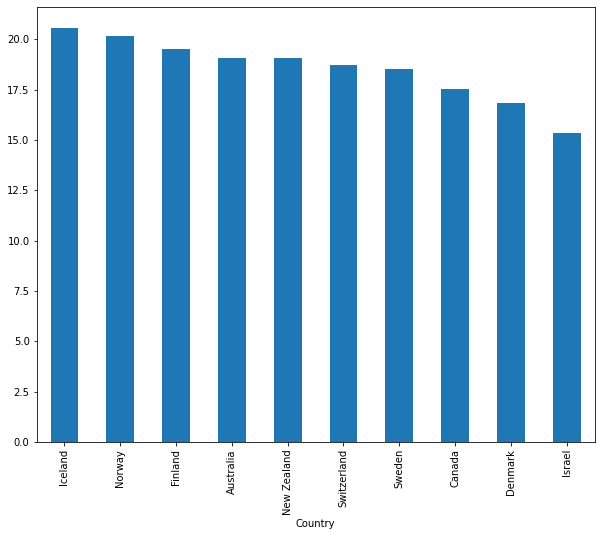

In [54]:
ERHNI_top_10['ERHNI'].plot(kind='bar',figsize=(10,8))

In [55]:
ERHNI_top_10

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country Code,2016_lifeexp,NHLY,2016_co2,2016_ch4,2016_n2o,2016_pop,2016_extcostratio,2016_llpp_who,PCEC,ERHNI
Country,,,,,,,,,,,,,,,,,,,,
Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,ISL,82.204878,20.559440,2070.0,550.0,400.0,335439.0,2.741844,0.00,0.0000,20.559440
Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NOR,82.407317,20.585348,37950.0,4990.0,3220.0,5234519.0,1.456668,0.04,0.3060,20.139607
Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,FIN,81.429268,19.648882,45710.0,4470.0,4650.0,5495303.0,1.922812,0.01,0.0765,19.501787
Australia,Australia and New Zealand,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,AUS,82.448780,19.070403,383960.0,118280.0,57390.0,24190907.0,5.707243,0.00,0.0000,19.070403
New Zealand,Australia and New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,NZL,81.612439,19.048343,31180.0,32810.0,14970.0,4714100.0,7.599986,0.00,0.0000,19.048343
Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,CHE,83.602439,20.975852,39610.0,4860.0,2190.0,8373338.0,0.654925,0.45,3.4425,18.721272
Sweden,Western Europe,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,SWE,82.307317,18.856606,38790.0,4770.0,4960.0,9923085.0,1.129138,0.04,0.3060,18.511090
Canada,North America,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,CAN,81.900000,19.688760,550480.0,90490.0,40990.0,36109487.0,2.805342,0.10,0.7650,17.542673
Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK,80.853659,20.423634,35380.0,7170.0,5080.0,5728010.0,2.054322,0.23,1.7595,16.809054


In [56]:
merged_2016.to_csv('2016.csv')

# Now let's calculate ERHNI for any subsequent years

In [57]:
happiness_2017 = pd.read_csv(os.path.join(csv_path, '2017.csv'))
happiness_2017.rename(columns={'Happiness.Score': 'Happiness Score',
                               'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                              'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                              'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                              'Dystopia.Residual': 'Dystopia Residual'},
                      inplace=True)
happiness_2017.to_csv('data/2017.csv')

In [58]:
happiness_2018 = pd.read_csv(os.path.join(csv_path, '2018.csv'))
happiness_2018.rename(columns={'Score': 'Happiness Score',
                               'GDP per capita': 'Economy (GDP per Capita)',
                              'Healthy life expectancy': 'Health (Life Expectancy)',
                               'Freedom to make life choices': 'Freedom',
                               'Social support': 'Family',
                              'Perceptions of corruption': 'Trust (Government Corruption)',
                              'Dystopia.Residual': 'Dystopia Residual',
                              'Country or region': 'Country'},
                      inplace=True)
happiness_2018.to_csv('data/2018.csv')

In [67]:
# Declare global variables
csv_path = 'data'
remaining_countries = {'Czech Republic' : 'CZE',
                      'Venezuela' : 'VEN',
                      'Moldova' : 'MDA',
                      'Russia' : 'RUS',
                      'South Korea' : 'KOR',
                      'Bolivia' : 'BOL',
                      'North Cyprus' : 'CYP',
                      'Macedonia' : 'MKD',
                      'Vietnam' : 'VNM',
                      'Laos' : 'LAO',
                      'Iran' : 'IRN',
                      'Congo (Kinshasa)' : 'COD',
                      'Congo (Brazzaville)' : 'COG',
                      'Tanzania' : 'TZA',
                      'Syria' : 'SYR'}

# Write a function taking year as an argument
def erhni(year):
    
    # first fetch happiness data for the year
    happiness = pd.read_csv(os.path.join(csv_path, year + '.csv'))
    happiness.head()
    
    # next fetch life expectancy
    lifeexp = pd.read_csv(os.path.join(csv_path, 'API_SP.DYN.LE00.IN_DS2_en_csv_v2_4150700.csv'), skiprows=4)
    
    # retrieve alpha3 code of countries
    def findCountryAlpha3(country_name):
        try:
            return pycountry.countries.get(name=country_name).alpha_3
        except:
            return ("not found")
    
    happiness['Country Code'] = happiness.apply(lambda row: findCountryAlpha3(row.Country), axis = 1)
    
    happiness[happiness['Country Code'] == 'not found']
    
    for index, row in happiness.iterrows():
        if row['Country Code'] == 'not found' and remaining_countries.get(row['Country']):
            happiness.at[index, 'Country Code'] = remaining_countries.get(row['Country'])
                    
    # call a test result
    happiness[happiness['Country'] == 'Denmark']
    
    # left merge on alpha3 code
    merged = happiness.merge(lifeexp.drop_duplicates(), on=['Country Code'], how = 'left', indicator=True)
    
    # now we can calculate NHLY for the respective year of interest
    merged = merged.loc[:, merged.columns.intersection(['Country','Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Country Code', year])]
    merged.rename(columns={year: year + '_lifeexp'}, inplace=True)
    merged['NHLY'] = (merged['Happiness Score'] - 5)  * 0.1 * merged[year + '_lifeexp']
    
    # add in GHG
    co2 = pd.read_csv(os.path.join(csv_path, 'API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4151102.csv'), skiprows=4)
    ch4 = pd.read_csv(os.path.join(csv_path, 'API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_4157045.csv'), skiprows=4)
    n2o = pd.read_csv(os.path.join(csv_path, 'API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_4157052.csv'), skiprows=4)
    pop = pd.read_csv(os.path.join(csv_path, 'API_SP.POP.TOTL_DS2_en_csv_v2_4251154.csv'), skiprows=4)
    
#     WLD_CO2 = co2[co2['Country Name'] == 'World'][year]
#     WLD_CH4 = ch4[ch4['Country Name'] == 'World'][year]
#     WLD_N2O = n2o[n2o['Country Name'] == 'World'][year]
#     WLD_POP = pop[pop['Country Name'] == 'World'][year]
    
    # potentials are for 100 years
    CH4_GWP = 21
    N2O_GWP = 310
    WLD_CO2 = co2[co2['Country Name'] == 'World'][year]
    WLD_CH4 = ch4[ch4['Country Name'] == 'World'][year]
    WLD_N2O = n2o[n2o['Country Name'] == 'World'][year]
    WLD_POP = pop[pop['Country Name'] == 'World'][year]
    
    merged = pd.merge(merged,co2[['Country Code', year]],on='Country Code', how='left')
    merged.rename(columns={year: year + '_co2'}, inplace=True)
    
    merged = pd.merge(merged,ch4[['Country Code', year]],on='Country Code', how='left')
    merged.rename(columns={year: year + '_ch4'}, inplace=True)
    
    merged = pd.merge(merged,n2o[['Country Code', year]],on='Country Code', how='left')
    merged.rename(columns={year: year + '_n2o'}, inplace=True)
    
    merged = pd.merge(merged,pop[['Country Code', year]],on='Country Code', how='left')
    merged.rename(columns={year: year + '_pop'}, inplace=True)
    
#     WLD_CO2 = merged[year + '_co2'].sum()
#     WLD_CH4 = merged[year + '_ch4'].sum()
#     WLD_N2O = merged[year + '_n2o'].sum()
#     WLD_POP = merged[year + '_pop'].sum()
    
    total_greenhouse_gases_country = merged[year + '_co2'] + merged[year + '_ch4'] * CH4_GWP + merged[year + '_n2o'] * N2O_GWP
    total_greenhouse_gases_world = WLD_CO2 + WLD_CH4 * CH4_GWP + WLD_N2O * N2O_GWP
    #total_greenhouse_gases_world = float(total_greenhouse_gases_world)
    #merged[year + '_total_greenhouse_gases_world'] = total_greenhouse_gases_world
    #print(total_greenhouse_gases_world)
    
    merged[year + '_extcostratio'] = (total_greenhouse_gases_country / merged[year + '_pop']) / (total_greenhouse_gases_world / WLD_POP)
    
    # add in AQLI data to calculate PCEC    
    aqli = pd.read_csv(os.path.join(csv_path, 'aqli_global_data.csv'))
    
    aqli.rename(columns={'iso_alpha3': 'Country Code'}, inplace=True)
    
    merged = pd.merge(merged, aqli[['Country Code', 'llpp_who_' + year]],on='Country Code', how='left')
    merged.rename(columns={'llpp_who_' + year: year + '_llpp_who'}, inplace=True)
    
    # now we can calculate ERHNI based on our equation
    
    merged['PCEC'] = merged[year + '_extcostratio'] * merged[year + '_llpp_who'] * (1+0.7) * (1+0.8) * 1 * 0.5 * 5

    # merged['PCEC'] = merged[year + '_extcostratio'] * merged[year + '_llpp_who']
    
    merged['ERHNI'] = merged['NHLY'] - merged['PCEC']
    
    merged.dropna(subset=['ERHNI'], inplace=True)
    
    merged.reset_index(drop=True, inplace=True)
    
    merged.to_csv('data/processed/' + year + '.csv')
    return merged

In [68]:
erhni('2016')

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,2016_lifeexp,NHLY,2016_co2,2016_ch4,2016_n2o,2016_pop,2016_extcostratio,2016_llpp_who,PCEC,ERHNI


In [61]:
# test = pd.read_csv('data/processed/2016.csv')
# test['ERHNI'].isna().sum()
# test.dropna(subset=['ERHNI'], inplace=True)

In [62]:
keys = {'2016' : ['Country','Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Country Code', '2016']}


def test(year):
    if 'year' in keys:
        print(keys[x])
        return keys[x]

In [63]:
keys.items()

dict_items([('2016', ['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Country Code', '2016'])])

In [64]:
test_2016 = pd.read_csv('data/processed/2016.csv')
test_2017 = pd.read_csv('data/processed/2017.csv')
test_2018 = pd.read_csv('data/processed/2018.csv')

test_2016.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Country Code', '2016_lifeexp', 'NHLY', '2016_co2',
       '2016_ch4', '2016_n2o', '2016_pop', '2016_extcostratio',
       '2016_llpp_who', 'PCEC', 'ERHNI'],
      dtype='object')

In [65]:
import numpy as np

test_2017['Country'][test_2017['Country'].isin(test_2018['Country']) == False]

# 36    Trinidad and Tobago and 58           North Cyprus are missing for year 2018

36    Trinidad and Tobago
58           North Cyprus
Name: Country, dtype: object

# Let's regress ERHNI for year 2016 against variables of interest

In [66]:
y = test_2016['ERHNI']
X = test_2016[['Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity']]

from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X)
model = OLS(y,X)
results = model.fit()
results.summary()
#results.params

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
y_2017 = test_2017['ERHNI']
X_2017 = test_2017[['Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity']]

X_2017 = sm.add_constant(X_2017)
model_2017 = OLS(y_2017,X_2017)
results_2017 = model.fit()
results_2017.summary()

In [ ]:
y_2018 = test_2018['ERHNI']
X_2018 = test_2018[['Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity']]

X_2018 = sm.add_constant(X_2018)
model_2018 = OLS(y_2018,X_2018)
results_2018 = model.fit()
results_2018.summary()

# Let's try to do a multi-year analysis by merging dataframes for the 3 years together

In [ ]:
merged_y = pd.read_csv('data/processed/merged_y.csv')
y = merged_y['ERHNI']
X = merged_y[['Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity']]

from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X)
model = OLS(y,X)
results = model.fit()
results.summary()

In [ ]:
test_2016['Year'] = '2016'

In [ ]:
test_2017['Year'] = '2017'
test_2018['Year'] = '2018'

In [ ]:
merged_y = pd.concat([test_2016, test_2017, test_2018], axis = 1)

In [ ]:
merged_y.to_csv('merged_y.csv')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(go.Scatter(x=[0, 1], y=[10, 6], mode='lines+markers+text', 
                           text=['start', 'end'], textposition=['middle left', 'middle right']))
fig.add_shape(type='line', x0=0, x1=0, y0=0, y1=1, xref='x', yref='paper')
fig.add_shape(type='line', x0=1, x1=1, y0=0, y1=1, xref='x', yref='paper')
fig.show()

In [ ]:
countries_lst = ['Iceland', 'Norway', 'Finland', 'Australia', 'New Zealand', 'Switzerland', 'Sweden', 'Canada', 'Denmark', 'Israel', 'United States', 'China', 'India']

In [ ]:
import plotly.express as px

#reduced_y = merged_y[merged_y['Country'].isin(countries_lst)]
#reduced_y
#df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(reduced_y, x="Year", y="ERHNI", color='Country', labels='Country')
fig.update_xaxes(nticks=3)
fig.update_traces(textposition='bottom center')
fig.show()

In [ ]:
#y = merged_y['ERHNI']
#X = merged_y[['Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity']]

fig = px.choropleth(merged_y, locations="Country Code", color="ERHNI", hover_name="Country", animation_frame="Year")
fig.show()